In [1]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from pylab import *

rcParams['font.size']=18
rcParams['figure.facecolor']='white'

from Tau_Decay_Simulator import Tau_Decay_Simulator

TDS = Tau_Decay_Simulator()

0.04794337669356674
0.0269933038822


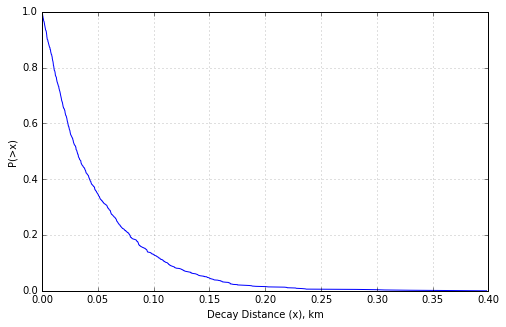

In [2]:
E_tau_eV = 1.e15
vals = TDS.sample_range(E_tau_eV, 1000)
print np.mean(vals)
u = (np.cumsum(np.ones(len(vals)))-1.) / (float(len(vals))-1.)
#hist(vals)
figure(figsize=(8,5))
plot(np.sort(vals), 1.-u)
grid(True, which='both', alpha=0.5)
xlabel('Decay Distance (x), km')
ylabel('P(>x)')

print TDS.sample_range(E_tau_eV, None)


In [ ]:
figure()
subplot(221)
plot(TDS.f_muon, TDS.f_hadron, '.')
ylabel('Hadron frac.')
subplot(222)
plot(TDS.f_electron, TDS.f_hadron, '.')
xlabel(r'$e^+/e^-$ frac.')
subplot(223)
plot(TDS.f_muon, TDS.f_electron, '.')
xlabel('Muon frac.')
ylabel(r'$e^+/e^-$ frac.')
subplots_adjust(hspace=0.15, wspace=0.15)

In [ ]:
'''
EMAIL JAIME ABOUT THIS!
'''
tot = TDS.f_muon + TDS.f_hadron + TDS.f_electron + TDS.f_nu_tau+ TDS.f_nu_e + TDS.f_nu_mu
tot1 = TDS.f_muon + TDS.f_hadron + TDS.f_electron 
hist(tot)
hist(tot1)

print float(np.sum(TDS.f_muon>0))/float(len(TDS.f_muon))
print float(np.sum(TDS.f_hadron>0))/float(len(TDS.f_hadron))
print float(np.sum(TDS.f_nu_e>0))/float(len(TDS.f_electron))
print float(np.sum(TDS.f_muon>0))/float(len(TDS.f_muon)) + float(np.sum(TDS.f_hadron>0))/float(len(TDS.f_hadron)) +  float(np.sum(TDS.f_nu_e>0))/float(len(TDS.f_electron))
print  ''


print float(np.sum(TDS.f_electron>0))#/float(len(TDS.f_electron))
print float(np.sum(TDS.f_muon>0))#, float(np.sum(TDS.f_nu_mu>0))

print float(np.sum(TDS.f_nu_mu>0))#/float(len(TDS.f_muon))
print float(np.sum(TDS.f_nu_e>0))#/float(len(TDS.f_muon))

print ''
print np.sum(np.logical_and(TDS.f_muon>0, TDS.f_hadron>0))
print np.sum(np.logical_or(TDS.f_muon>0, TDS.f_hadron>0))

figure()
plot(TDS.f_nu_mu, TDS.f_muon, '.')
figure()
plot(TDS.f_nu_mu, TDS.f_electron, '.')

#figure()
#plot(TDS.f_nu_tau, TDS.f_nu_mu, '.')

In [ ]:
print 'TDS.P_shower', TDS.P_shower
print 'TDS.P_e_shower', TDS.P_e_shower
print 'TDS.P_h_shower', TDS.P_h_shower
print 'TDS.P_h_shower + TDS.P_e_shower', TDS.P_h_shower + TDS.P_e_shower

print np.sum(np.logical_or(TDS.f_hadron>0., TDS.f_electron>0.))

print np.sum(TDS.shower_cut), np.sum(TDS.e_shower_cut), np.sum(TDS.h_shower_cut), np.sum(TDS.e_shower_cut) + np.sum(TDS.h_shower_cut)


In [ ]:
cc = 0
f_h = []
f_e = []
for k in range(0,10000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))

hist(f_h, normed=1, bins=np.arange(0.,1.01,0.05))
hist(TDS.f_hadron[TDS.h_shower_cut], normed=1, bins=np.arange(0.,1.01,0.05), alpha=0.5)
xlabel('Fraction of Energy in Hadrons')
figure()
hist(f_e, normed=1, bins=np.arange(0.,1.01,0.05))
hist(TDS.f_electron[TDS.e_shower_cut], normed=1, bins=np.arange(0.,1.01,0.05), alpha=0.5)
xlabel(r'Fraction of Energy in $e^+/e^-$')

print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)

In [ ]:
cc = 0
f_h = []
f_e = []
for k in range(0,10000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))

#hist(np.log10(TDS.f_hadron[TDS.h_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)
u = (np.cumsum(np.ones(len(TDS.f_hadron[TDS.h_shower_cut])))-1.)/(float(len(TDS.f_hadron[TDS.h_shower_cut]))-1.)
print u
loglog(np.sort(TDS.f_hadron[TDS.h_shower_cut]), u, '-')
xlabel('Fraction of Energy in Hadrons')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
#hist(np.log10(TDS.f_electron[TDS.e_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)

figure()
u = (np.cumsum(np.ones(len(TDS.f_electron[TDS.e_shower_cut])))-1.)/(float(len(TDS.f_electron[TDS.e_shower_cut]))-1.)
print u
loglog(np.sort(TDS.f_electron[TDS.e_shower_cut]), u, '-')
xlabel(r'Fraction of Energy in $e^+/e^-$')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')

print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

figure(figsize=(7,4))
cc = 0
f_h = []
f_e = []
for k in range(0,10000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))

subplot(1,1,1)
#hist(np.log10(TDS.f_hadron[TDS.h_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)
u = (np.cumsum(np.ones(len(TDS.f_hadron[TDS.h_shower_cut])))-1.)/(float(len(TDS.f_hadron[TDS.h_shower_cut]))-1.)
print u
plot(np.sort(TDS.f_hadron[TDS.h_shower_cut]), 1-u, 'r-', lw=2, label='hadrons')
xlabel('Fraction of Energy in Hadrons')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
#hist(np.log10(TDS.f_electron[TDS.e_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)

#figure()
#subplot(1,2,2)
u = (np.cumsum(np.ones(len(TDS.f_electron[TDS.e_shower_cut])))-1.)/(float(len(TDS.f_electron[TDS.e_shower_cut]))-1.)
print u
plot(np.sort(TDS.f_electron[TDS.e_shower_cut]), 1-u, 'b-', lw=2, label='electron')
xlabel(r'Fraction of Energy')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
legend(loc=0, fontsize=14)
print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)
yticks(np.arange(0.,1.05, 0.1))
xticks(np.arange(0.,1.05, 0.1))

print '\nmean'
print '1', np.mean(TDS.f_hadron[TDS.h_shower_cut])
print '2', np.mean(TDS.f_electron[TDS.e_shower_cut])

print '\nstd'
print '1', np.std(TDS.f_hadron[TDS.h_shower_cut])
print '2', np.std(TDS.f_electron[TDS.e_shower_cut])

print '\nskew'
print '1', skew(TDS.f_hadron[TDS.h_shower_cut])
print '2', skew(TDS.f_electron[TDS.e_shower_cut])


print '\nkurtosis'
print '1', kurtosis(TDS.f_hadron[TDS.h_shower_cut])
print '2', kurtosis(TDS.f_electron[TDS.e_shower_cut])


print '\nmedian'
print '1', np.median(TDS.f_hadron[TDS.h_shower_cut])
print '2', np.median(TDS.f_electron[TDS.e_shower_cut])

print '\nMAD'
print '1', np.median(np.abs(TDS.f_hadron[TDS.h_shower_cut]-np.median(TDS.f_hadron[TDS.h_shower_cut])))
print '2', np.median(np.abs(TDS.f_electron[TDS.e_shower_cut]-np.median(TDS.f_electron[TDS.e_shower_cut])))

print '\nmean log'
print '1', np.mean(np.log10(TDS.f_hadron[TDS.h_shower_cut])),  10**np.mean(np.log10(TDS.f_hadron[TDS.h_shower_cut]))
print '2', np.mean(np.log10(TDS.f_electron[TDS.e_shower_cut])), 10**np.mean(np.log10(TDS.f_electron[TDS.e_shower_cut]))

print '\nstd log'
print '1', np.std(np.log10(TDS.f_hadron[TDS.h_shower_cut])), 10**np.std(np.log10(TDS.f_hadron[TDS.h_shower_cut]))
print '2', np.std(np.log10(TDS.f_electron[TDS.e_shower_cut])), 10**np.std(np.log10(TDS.f_electron[TDS.e_shower_cut]))

tight_layout()
savefig('frac_energy_cumu.pdf')


In [ ]:
figure(figsize=(7,4))
cc = 0
f_h = []
f_e = []
for k in range(0,100000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))
dx = 0.05
subplot(1,1,1)
#hist(np.log10(TDS.f_hadron[TDS.h_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)
u = (np.cumsum(np.ones(len(TDS.f_hadron[TDS.h_shower_cut])))-1.)/(float(len(TDS.f_hadron[TDS.h_shower_cut]))-1.)
print u
h,b = np.histogram(TDS.f_hadron[TDS.h_shower_cut], bins=np.arange(-dx, 1.+dx, dx))
plot(b[1:],h.astype(float)/np.sum(h), 'r-', lw=2, drawstyle='steps', label='hadrons')
print h
xlabel('Fraction of Energy in Hadrons')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
#hist(np.log10(TDS.f_electron[TDS.e_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)

#figure()
#subplot(1,2,2)
u = (np.cumsum(np.ones(len(TDS.f_electron[TDS.e_shower_cut])))-1.)/(float(len(TDS.f_electron[TDS.e_shower_cut]))-1.)
print u
h,b = np.histogram(TDS.f_electron[TDS.e_shower_cut],  bins=np.arange(-dx, 1.+dx, dx))
plot(b[1:],h.astype(float)/np.sum(h), 'b-', lw=2, drawstyle='steps', label='electrons')

#plot(np.sort(TDS.f_electron[TDS.e_shower_cut]), 1-u, 'b-', lw=2, label='electron')
xlabel(r'Fraction of Energy')
grid(True, which='both', alpha=0.5)
ylabel('Frequency per bin')
legend(loc=0, fontsize=14)
print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)
#yticks(np.arange(0.,1.05, 0.1))
xticks(np.arange(0.,1.05, 0.1))


tight_layout()
savefig('frac_energy_diff.pdf')


In [ ]:
print len(TDS.f_hadron[TDS.h_shower_cut])
print len(TDS.f_electron[TDS.e_shower_cut])

f_shower = np.concatenate([TDS.f_hadron[TDS.h_shower_cut],TDS.f_electron[TDS.e_shower_cut]])

u = np.arange(1, len(f_shower)+1)
u = u/float(len(u)+1)
f_shower = np.sort(f_shower)

min_interval = 1.
min_k1 = 0
min_k2 = 0
for k in range(0,len(u)):
    k2 = np.argmin(np.abs(u-u[k] - 0.68001))
    if u[k2]-u[k]<0.6799: continue
    if f_shower[k2]-f_shower[k] < min_interval:
        min_interval = f_shower[k2]-f_shower[k]
        min_k1 = k
        min_k2 = k2
        #if k>10000:
        #    print k, k2, u[k2]-u[k], f_shower[k2]-f_shower[k], min_interval, f_shower[k], f_shower[k2]

        
subplot(211)
hist(f_shower, bins=np.arange(0., 1.01, 0.05))
y1,y2 = ylim()
plot([f_shower[min_k1],f_shower[min_k1]], [y1, y2], 'r--', lw=4)
plot([f_shower[min_k2],f_shower[min_k2]], [y1, y2], 'r--', lw=4)
ylabel('PDF')
subplot(212)
plot(f_shower, u)
y1,y2 = ylim()
plot([f_shower[min_k1],f_shower[min_k1]], [y1, y2], 'r--', lw=4)
plot([f_shower[min_k2],f_shower[min_k2]], [y1, y2], 'r--', lw=4)
xlabel('Fraction of Energy in Showering Particles')
ylabel('CDF')

In [ ]:
print f_shower[min_k1], f_shower[min_k2], f_shower[min_k2]-f_shower[min_k1]

In [ ]:
subplot(211)
loglog(f_shower, u)
y1,y2 = ylim()
plot([(f_shower[min_k1]), (f_shower[min_k1])], [y1, y2], 'r--', lw=4)
plot([(f_shower[min_k2]), (f_shower[min_k2])], [y1, y2], 'r--', lw=4)
grid(True, which='both')
xlabel('Fraction of Energy in Showering Particles')
ylabel('CDF')
subplot(212)
loglog(f_shower, u)
y1,y2 = ylim()
plot([(f_shower[min_k1]), (f_shower[min_k1])], [y1, y2], 'r--', lw=4)
plot([(f_shower[min_k2]), (f_shower[min_k2])], [y1, y2], 'r--', lw=4)
xlim(1.e-2, 1.)
ylim(1.e-2, 1.)
grid(True, which='both')
xlabel('Fraction of Energy in Showering Particles')
ylabel('CDF')

print np.mean(f_shower), np.median(f_shower)